In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np

In [2]:
log = '../sample_dataset/log.pkl'
with open(log, 'rb') as f:
    log_dict = pickle.load(f)

In [3]:
log_dict.keys()

['N_friends', 'merge_time', 'N_items_to_merge', 'find_friends_time']

In [4]:
import pandas as pd

In [5]:
for k in log_dict.keys():
    print k
    print len(log_dict[k])

N_friends
400257
merge_time
400257
N_items_to_merge
400257
find_friends_time
400257


In [6]:
df = pd.DataFrame(log_dict)

In [7]:
df = df[np.abs(df.merge_time-df.merge_time.mean())<=(20*df.merge_time.std())]
df = df[np.abs(df.find_friends_time-df.find_friends_time.mean())<=(20*df.find_friends_time.std())]

In [8]:
N_window = 100
df_r = df.rolling(window=N_window).median()

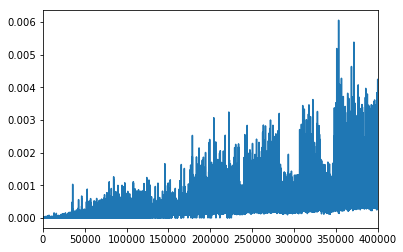

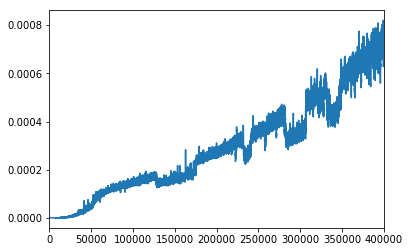

In [9]:
df.merge_time.plot()
plt.figure()
df_r.merge_time.plot()

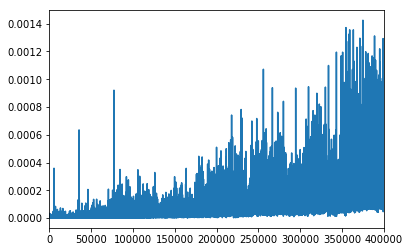

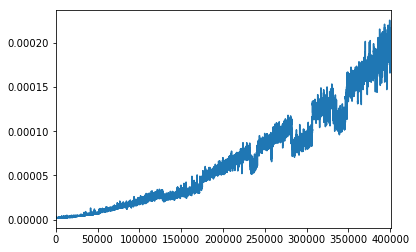

In [10]:
df.find_friends_time.plot()
plt.figure()
df_r.find_friends_time.plot()

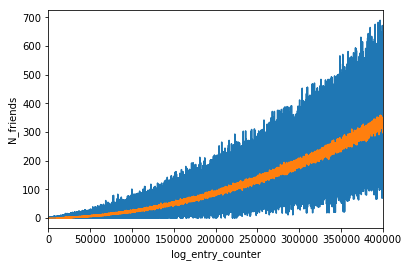

In [20]:
df.N_friends.plot()
df_r.N_friends.plot()
plt.xlabel('log_entry_counter')
plt.ylabel('N_friends')

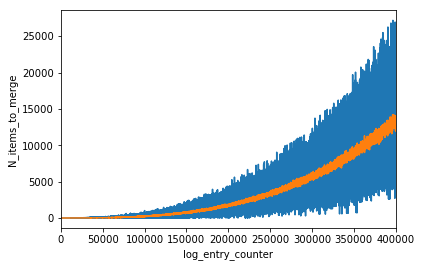

In [19]:
df.N_items_to_merge.plot()
df_r.N_items_to_merge.plot()
plt.xlabel('log_entry_counter')
plt.ylabel('N_items_to_merge')

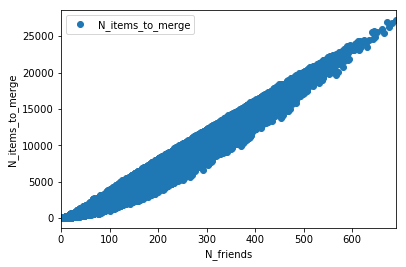

In [26]:
df.plot(x='N_friends', y='N_items_to_merge', style='o')
plt.ylabel('N_items_to_merge')
plt.autoscale(enable=True, axis='x', tight=True)

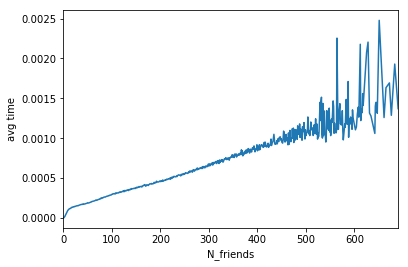

In [21]:
t = df.groupby(['N_friends']).mean().merge_time.plot()
plt.ylabel('avg time')

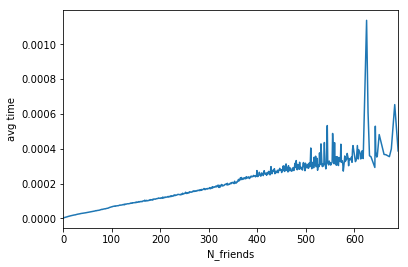

In [22]:
df.groupby(['N_friends']).mean().find_friends_time.plot()
plt.ylabel('avg time')